# 로지스틱 회귀

- 의의
    - 확률을 예측하는데에 사용되는 통계 모델
        - 특정 결과의 확률을 계산
        
    - 결과값은 이진이어야함(결과는 둘 중 하나)
        - 원하는 결과는 1, 원하지 않는 결과는 0
        
    - 선형 회귀와 마찬가지로 다중공선성은 거의 없어야 함
        - 독립변수는 서로 독립적이어야 함
        
    - 종속변수와 관련 없는 독립 변수를 제거할 때 더 효율적인 경향이 있음
    
- 장점
    - 많은 양의 연산 자원을 필요로 하지 않음
    - 쉽게 해석할 수 있음
    
- 단점
    - 비선형 데이터에 사용하기 힘듦
    - 과대적합에 취약함
    - 1과 0으로만 결과가 출력되기 때문에 범주형 결과를 예측하는 데에만 사용 가능

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from scipy.special import expit, softmax
from sklearn.metrics import roc_curve, roc_auc_score

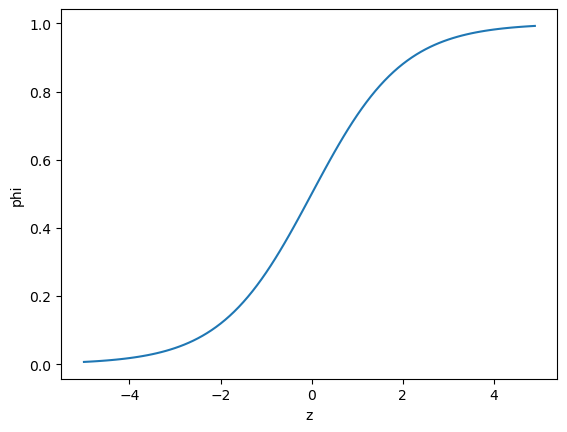

In [3]:
# 로지스틱 함수 시각화
z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z))

plt.plot(z, phi)
plt.xlabel("z")
plt.ylabel("phi")
plt.show()

## 데이터 준비

In [7]:
df = pd.read_csv("./data/Fish.csv")

In [8]:
df_bs = df[(df["Species"] == "Bream") | (df["Species"] == "Smelt")]

In [9]:
df_bs.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [10]:
df_bs = df_bs.drop("Length1", axis = 1)

In [11]:
df_bs.head()

,Species,Weight,Length2,Length3,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [12]:
# 데이터 분할
x = df_bs.drop("Species", axis = 1)
y = df_bs["Species"]

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, stratify = y, random_state = 11)

In [15]:
# 스케일링
ss = StandardScaler()
scaled_train = ss.fit_transform(x_train)
scaled_test = ss.transform(x_test)

## 모델 훈련

In [16]:
logi = LogisticRegression()
logi.fit(scaled_train, y_train)

LogisticRegression()

In [17]:
logi.predict(scaled_test)

array(['Bream', 'Bream', 'Bream', 'Smelt', 'Bream', 'Smelt', 'Smelt',
       'Bream', 'Bream', 'Smelt', 'Bream', 'Bream', 'Bream'], dtype=object)

In [18]:
# 예측확률 출력
logi.predict_proba(scaled_test)[:5]

array([[0.9918541 , 0.0081459 ],
       [0.91641922, 0.08358078],
       [0.97878238, 0.02121762],
       [0.09707529, 0.90292471],
       [0.99175592, 0.00824408]])

In [20]:
# 종속변수 값 확인
logi.classes_

array(['Bream', 'Smelt'], dtype=object)

In [21]:
# 로지스틱 회귀 회귀식 확인
logi.coef_, logi.intercept_

(array([[-0.56734399, -0.77612752, -0.8107218 , -0.84600475, -0.80812209]]),
 array([-2.70021172]))

- z = Weight * -0.56 + Length2 * -0.77 + Legth3 * -0.81 + Height * -0.84 + Width * -0.8 + (-2.7)

### 회귀식을 통한 확률값 계산

In [23]:
# z값 계산
decision_z = logi.decision_function(scaled_test[:5])
decision_z

array([-4.80206113, -2.3946603 , -3.83147719,  2.2301523 , -4.78998212])

In [24]:
scaled_test[0]

array([0.70633413, 0.54797717, 0.5674028 , 0.50706058, 0.4786818 ])

In [25]:
0.7 * -0.56 + 0.54 * -0.77 + 0.56 * -0.81 + 0.5 * -0.84 + 0.47 * -0.8 -2.7

-4.7574000000000005

In [26]:
# z값을 시그모이드 함수를 통과시켜 확률값 계산
expit(decision_z)

array([0.0081459 , 0.08358078, 0.02121762, 0.90292471, 0.00824408])

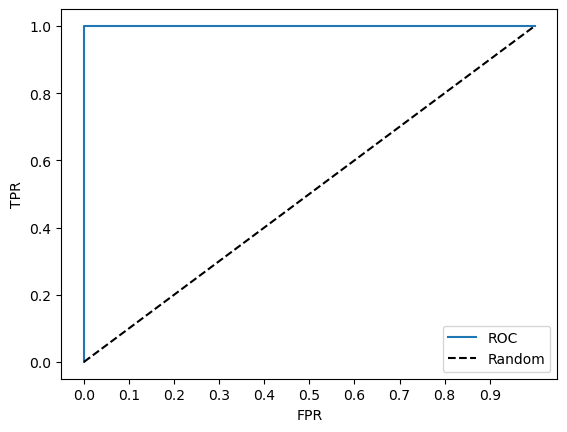

In [29]:
# roc커브
pred_proba_class1 = logi.predict_proba(scaled_test)[:, 1]

fprs, tprs, thresholds = roc_curve(y_test.map(lambda x: 0 if x == "Bream" else 1), pred_proba_class1)

plt.figure()
plt.plot(fprs, tprs, label = "ROC")
plt.plot([0, 1], [0, 1], "k--", label = "Random")

plt.xticks(np.round(np.arange(0, 1, 0.1), 2))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()

plt.show()

In [30]:
# auc score
roc_auc_score(y_test, pred_proba_class1)

1.0

In [31]:
# 정확도
logi.score(scaled_test, y_test)

1.0

# 로지스틱 회귀로 다중 분류

In [32]:
df = df[["Species", "Weight", "Length2", "Length3", "Height", "Width"]]

In [33]:
x = df.drop("Species", axis = 1)
y = df["Species"]

In [34]:
df.shape

(159, 6)

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, stratify = y, random_state = 11)

In [36]:
ss = StandardScaler()
scaled_train = ss.fit_transform(x_train)
scaled_test = ss.transform(x_test)

In [37]:
logi = LogisticRegression()
logi.fit(scaled_train, y_train)
print(logi.score(scaled_train, y_train))
print(logi.score(scaled_test, y_test))

0.8151260504201681
0.8


In [38]:
logi.predict(scaled_test)

array(['Bream', 'Parkki', 'Bream', 'Perch', 'Perch', 'Smelt', 'Perch',
       'Perch', 'Pike', 'Perch', 'Smelt', 'Perch', 'Perch', 'Smelt',
       'Pike', 'Parkki', 'Bream', 'Perch', 'Perch', 'Bream', 'Bream',
       'Bream', 'Bream', 'Perch', 'Perch', 'Parkki', 'Pike', 'Perch',
       'Perch', 'Bream', 'Perch', 'Pike', 'Smelt', 'Bream', 'Perch',
       'Perch', 'Perch', 'Perch', 'Smelt', 'Smelt'], dtype=object)

In [39]:
# 예측 확률값 확인
proba = logi.predict_proba(scaled_test[:5])
print(np.round(proba, decimals = 3))

[[0.616 0.197 0.047 0.009 0.089 0.    0.041]
 [0.16  0.503 0.085 0.009 0.202 0.011 0.03 ]
 [0.693 0.091 0.064 0.022 0.072 0.    0.057]
 [0.008 0.141 0.433 0.011 0.305 0.079 0.023]
 [0.006 0.099 0.482 0.015 0.297 0.08  0.022]]


In [40]:
# 종속변수 확인
logi.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [41]:
# 회귀식 확인
logi.coef_

array([[-0.10216394, -0.14437304,  0.5962784 ,  2.90437953, -0.22327783],
       [-0.3083481 , -0.76387413, -0.73837986,  1.83005633, -0.81466926],
       [ 0.95550322,  0.4236401 , -1.16998184, -1.73621143,  1.92493972],
       [-0.03542466,  1.79623211,  1.7703477 , -1.23692486, -0.6992827 ],
       [-0.79516063, -0.40675146,  0.40115519, -0.40351006,  0.46193563],
       [-0.35050409, -0.92107444, -0.96417675, -1.38192588, -1.5327255 ],
       [ 0.63609821,  0.01620086,  0.10475716,  0.02413637,  0.88307994]])

In [42]:
logi.intercept_

array([ 0.61020577, -0.13959349,  2.3421575 ,  0.14409876,  0.97894533,
       -4.4910165 ,  0.55520264])

- 현재의 로지스틱 다중분류에서 독립변수는 5개를 사용하기 때문에 coef_ 배열의 열은 5개임
- 종속변수의 범주 수가 7개이기 때문에 coef_ 배열의 행과 intercept의 행은 7개임
    - 즉, 로지스틱 다중분류는 각 클래스마다 z값을 계산함
    - 이때 확률값은 각각의 z값을 합이 1이 되도록 압축하기 위해 소프트맥스 함수(softmax)를 사용

### 회귀식을 통한 확률값 계산

In [43]:
decision_z = logi.decision_function(scaled_test[:5])
np.round(decision_z, decimals = 2)

array([[ 2.9 ,  1.77,  0.34, -1.31,  0.97, -4.86,  0.19],
       [ 0.92,  2.07,  0.29, -1.91,  1.16, -1.77, -0.75],
       [ 3.1 ,  1.07,  0.73, -0.33,  0.84, -6.01,  0.61],
       [-2.01,  0.84,  1.96, -1.69,  1.61,  0.26, -0.98],
       [-2.33,  0.55,  2.13, -1.35,  1.65,  0.33, -0.98]])

In [45]:
proba = softmax(decision_z, axis = 1)
np.round(proba, decimals = 3)

array([[0.616, 0.197, 0.047, 0.009, 0.089, 0.   , 0.041],
       [0.16 , 0.503, 0.085, 0.009, 0.202, 0.011, 0.03 ],
       [0.693, 0.091, 0.064, 0.022, 0.072, 0.   , 0.057],
       [0.008, 0.141, 0.433, 0.011, 0.305, 0.079, 0.023],
       [0.006, 0.099, 0.482, 0.015, 0.297, 0.08 , 0.022]])

# 정리

- 로지스틱 회귀는 선형 회귀처럼 선형 방정식을 사용
- 방정식의 값을 0 ~ 1 사이로 압축
    - 해당 값을 0 ~ 100% 사이의 확률로 이해할 수 있음
    
- 이진 분류
    1. 하나의 선형 방정식을 훈련
    2. 출력값을 시그모이드 함수에 통과시켜 0 ~ 1 사이의 값을 만듦
    3. 2번의 출력값이 양성 클래스에 대한 확률
    
- 다중 분류
    1. 클래스 개수만큼 방정식을 훈련
    2. 각 방정식의 출력값을 소프트맥스 함수를 통과시켜 전체 클래스에 대한 합이 항상 1이 되도록 계산
    3. 2번의 출력값이 각 클래스에 대한 확률값

# ROC곡선(Receiver Operation Characteristic Curve)

<img src = "./image/roc.png">

- 수신자 판단 곡선
- 머신러닝의 이진 분류 모델의 예측 성능을 판단하는 평가 지표
- FPR(False Positive Rate)가 변할 때 TPR(True Positive Rate)의 변화를 나타낸 곡선
    - TPR
        - 재현율
        - TP / (TP + FN)
        - 실제 양성인 데이터 중 양성으로 예측된 비율
        
    - FPR
        - 1 - 특이도
        - FP / (FP + TN)
        - 실제 음성인 데이터 중 양성으로 잘못 예측된 비율
        
- ROC 곡선의 가운데 직선은 ROC 곡선의 최저값
    - 랜덤 수준의 이진 분류의 ROC 직선
    - ROC 곡선이 직선에서 멀어질수록 성능이 뛰어난 것
    
- 분류 결정 임계값을 변경하여 FPR 을 0부터 1까지 변경하면서 TPR의 변화값을 구함
    - 임계값을 1로 지정하면 FPR은 0이 됨
        - 100% 확실한 경우에만 양성으로 예측한다면 실제 음성인 데이터를 양성으로 잘못 예측할 확률은 0
        
    - 임계값을 0으로 지정하면 FPR은 1이 됨
        - 모든 데이터를 양성으로 예측한다면 실제 음성인 데이터를 양성으로 잘못 예측할 확률은 100%